In [167]:
import pandas as pd
import geopandas as gpd
import cbsodata
import numpy as np
import matplotlib.pyplot as plt

In [168]:
data_nl = pd.DataFrame(cbsodata.get_meta('85826NED', 'TypedDataSet'))

data_nl = data_nl[['ID', 'Persoonskenmerken', 'RegioS','Perioden','WerklozeBeroepsbevolking_12']]

data_nl = data_nl[data_nl['Perioden'] == '2020JJ00']
data_nl['Perioden'] = data_nl['Perioden'].str.extract(r'(\d{4})')

data_nl = data_nl[data_nl['Persoonskenmerken'] == 'T009002']

#data_nl.replace(0, np.nan, inplace=True)
data_nl = data_nl.dropna()

data_nl


,ID,Persoonskenmerken,RegioS,Perioden,WerklozeBeroepsbevolking_12
7,7,T009002,NL01,2020,465.0
18,18,T009002,LD01,2020,47.0
29,29,T009002,LD02,2020,92.0
40,40,T009002,LD03,2020,232.0
51,51,T009002,LD04,2020,94.0
...,...,...,...,...,...
4726,4726,T009002,AM34,2020,9.0
4737,4737,T009002,AM35,2020,3.0
4748,4748,T009002,AM36,2020,13.0
4759,4759,T009002,AM37,2020,10.0


In [169]:
data_de = pd.read_csv("out/csvs/indicator_Arbeitslosenquote.csv")

data_de = data_de[data_de['Zeitbezug'] == 2020]

data_de.replace(0, np.nan, inplace=True)
data_de = data_de.dropna()

data_de

,Kennziffer,Wert,Zeitbezug
22,111,5.89,2020
45,1,5.84,2020
68,2,7.55,2020
91,3,5.76,2020
114,4,11.19,2020
...,...,...,...
9521,16073000,5.85,2020
9544,16074000,4.54,2020
9567,16075000,4.89,2020
9590,16076000,5.29,2020


In [170]:
municipal_boundaries_nl = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")

municipal_boundaries_nl = municipal_boundaries_nl[['statcode', 'statnaam', 'geometry']]

municipal_boundaries_nl = pd.merge(municipal_boundaries_nl, data_nl,
                               left_on = "statcode", 
                               right_on = "RegioS")

municipal_boundaries_nl = municipal_boundaries_nl[['statcode', 'statnaam', 'geometry', 'RegioS', 'WerklozeBeroepsbevolking_12', 'Perioden' ]]

municipal_boundaries_nl.columns = ['Code', 'Name', 'geometry', 'Kennziffer', 'Wert', 'Zeitbezug']

municipal_boundaries_nl

,Code,Name,geometry,Kennziffer,Wert,Zeitbezug
0,GM0014,Groningen,"MULTIPOLYGON (((245194.691 592594.007, 245344....",GM0014,9.0,2020
1,GM0034,Almere,"MULTIPOLYGON (((146891.056 493291.709, 147422....",GM0034,7.0,2020
2,GM0037,Stadskanaal,"MULTIPOLYGON (((263763.866 566430.392, 263988....",GM0037,1.0,2020
3,GM0047,Veendam,"MULTIPOLYGON (((256231.909 572319.213, 258595....",GM0047,1.0,2020
4,GM0050,Zeewolde,"MULTIPOLYGON (((170596.293 486786.456, 170560....",GM0050,1.0,2020
...,...,...,...,...,...,...
333,GM1966,Het Hogeland,"MULTIPOLYGON (((215071.742 595253.084, 215169....",GM1966,1.0,2020
334,GM1969,Westerkwartier,"MULTIPOLYGON (((217623.770 592502.490, 217917....",GM1969,1.0,2020
335,GM1970,Noardeast-Fryslân,"MULTIPOLYGON (((207686.537 595425.623, 207640....",GM1970,1.0,2020
336,GM1978,Molenlanden,"MULTIPOLYGON (((123712.581 439998.364, 124188....",GM1978,1.0,2020


In [171]:
municipal_boundaries_de = gpd.read_file(filename='../data/DE_VG250.gpkg', layer="vg250_krs",engine="pyogrio")

municipal_boundaries_de['AGS_int'] = municipal_boundaries_de.AGS_0.astype(int)#

municipal_boundaries_de = municipal_boundaries_de[['AGS_int', 'GEN', 'geometry']]

municipal_boundaries_de = pd.merge(municipal_boundaries_de, data_de,
                             left_on = "AGS_int", 
                              right_on = "Kennziffer")

municipal_boundaries_de.columns = ['Code', 'Name', 'geometry', 'Kennziffer', 'Wert', 'Zeitbezug']

municipal_boundaries_de

,Code,Name,geometry,Kennziffer,Wert,Zeitbezug
0,1001000,Flensburg,"MULTIPOLYGON (((526513.753 6075133.412, 526547...",1001000,9.06,2020
1,1001000,Flensburg,"MULTIPOLYGON (((531016.578 6076768.422, 531473...",1001000,9.06,2020
2,1002000,Kiel,"MULTIPOLYGON (((575841.569 6032148.032, 575869...",1002000,8.48,2020
3,1002000,Kiel,"MULTIPOLYGON (((575848.336 6032304.652, 575965...",1002000,8.48,2020
4,1003000,Lübeck,"MULTIPOLYGON (((623056.151 5983746.445, 623191...",1003000,8.14,2020
...,...,...,...,...,...,...
425,16073000,Saalfeld-Rudolstadt,"MULTIPOLYGON (((659352.786 5633725.523, 659501...",16073000,5.85,2020
426,16074000,Saale-Holzland-Kreis,"MULTIPOLYGON (((688961.348 5662575.516, 688976...",16074000,4.54,2020
427,16075000,Saale-Orla-Kreis,"MULTIPOLYGON (((699461.667 5630277.321, 699499...",16075000,4.89,2020
428,16076000,Greiz,"MULTIPOLYGON (((724109.327 5650625.772, 724321...",16076000,5.29,2020


Text(0.5, 1.0, 'Quantiles, 2020')

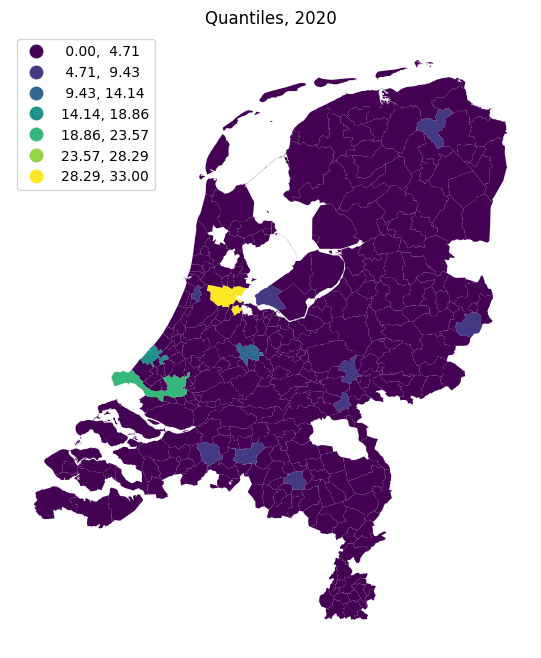

In [183]:
p = municipal_boundaries_nl.plot(column='Wert',
                             scheme="equalinterval",
                             k=7,
                             legend=True,
                             legend_kwds={'loc': 'upper left'},
                             figsize = (8,8))
p.axis('off')
p.set_title('Quantiles, 2020')

Text(0.5, 1.0, 'Quantiles, 2020')

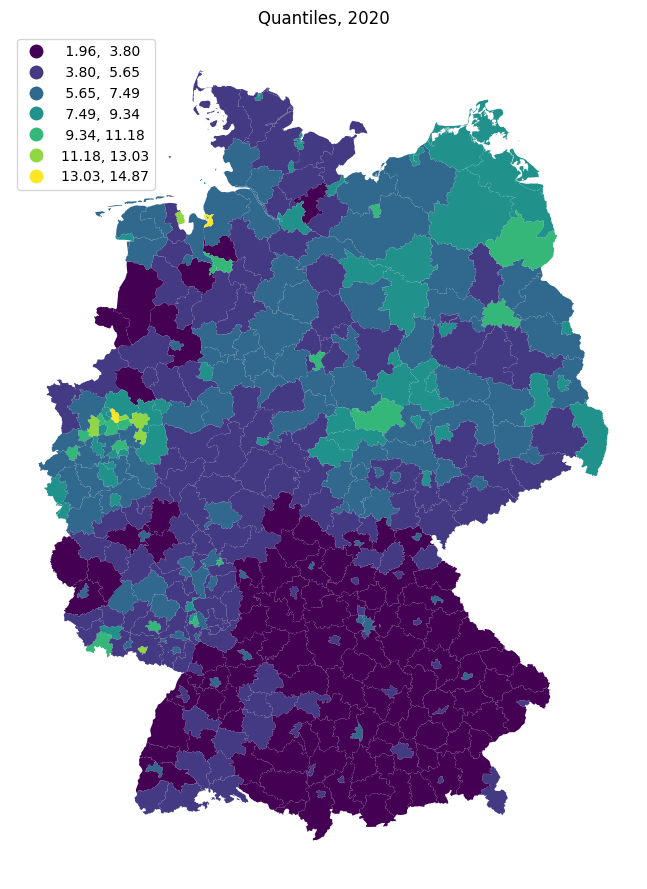

In [184]:
p = municipal_boundaries_de.plot(column='Wert',
                             scheme="equalinterval",
                             k=7,
                             legend=True,
                             legend_kwds={'loc': 'upper left'},
                             figsize = (11,11))
p.axis('off')
p.set_title('Quantiles, 2020')

In [174]:
de = municipal_boundaries_de.to_crs('epsg:3035')
nl = municipal_boundaries_nl.to_crs('epsg:3035')

data_mixed = pd.concat([nl, de], ignore_index=True)

data_mixed


,Code,Name,geometry,Kennziffer,Wert,Zeitbezug
0,GM0014,Groningen,"MULTIPOLYGON (((4103810.729 3360893.031, 41039...",GM0014,9.00,2020
1,GM0034,Almere,"MULTIPOLYGON (((3999375.839 3268013.648, 39998...",GM0034,7.00,2020
2,GM0037,Stadskanaal,"MULTIPOLYGON (((4120663.331 3333600.459, 41208...",GM0037,1.00,2020
3,GM0047,Veendam,"MULTIPOLYGON (((4113524.608 3339956.737, 41158...",GM0047,1.00,2020
4,GM0050,Zeewolde,"MULTIPOLYGON (((4022614.611 3260017.421, 40225...",GM0050,1.00,2020
...,...,...,...,...,...,...
763,16073000,Saalfeld-Rudolstadt,"MULTIPOLYGON (((4409973.500 3080963.490, 44101...",16073000,5.85,2020
764,16074000,Saale-Holzland-Kreis,"MULTIPOLYGON (((4439969.466 3109415.347, 44399...",16074000,4.54,2020
765,16075000,Saale-Orla-Kreis,"MULTIPOLYGON (((4450032.187 3076981.042, 44500...",16075000,4.89,2020
766,16076000,Greiz,"MULTIPOLYGON (((4474946.993 3096997.500, 44751...",16076000,5.29,2020


Text(0.5, 1.0, 'Quantiles, 2020')

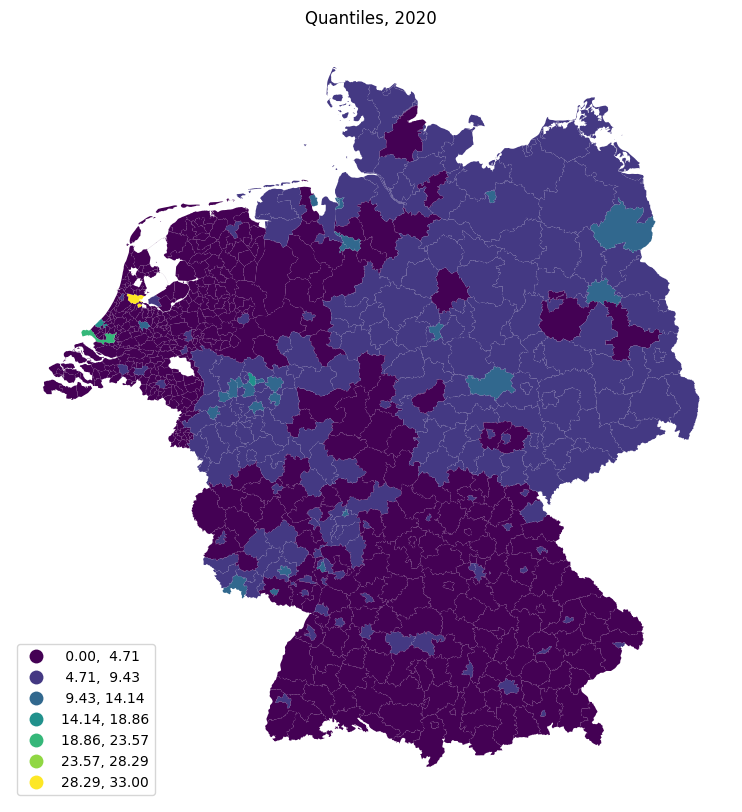

In [192]:
p = data_mixed.plot(column='Wert',
                             scheme="equalinterval",
                             k=7,
                             legend=True,
                             legend_kwds={'loc': 'lower left'},
                             figsize = (10,10))
p.axis('off')
p.set_title('Quantiles, 2020')